<a href="https://colab.research.google.com/github/orodriguezq/orodriguezq-Senales_Y_Sistemas/blob/main/Introduccion_S_Y_S/Ejercicios_clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio 1

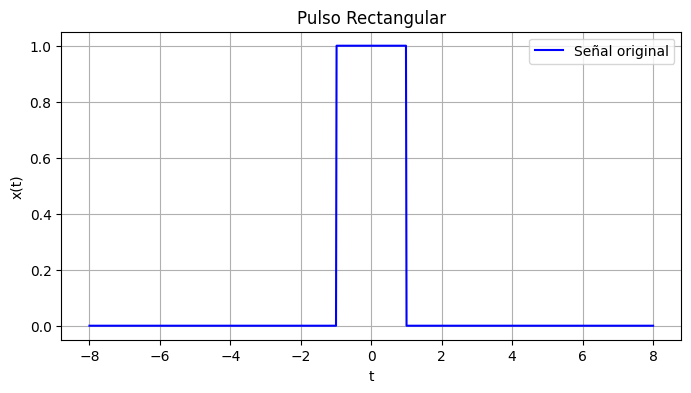

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
A = 1
tau = 2
T = 4
w0 = 2 * np.pi / T
t = np.linspace(-2*T, 2*T, 1000)

# Señal original: pulso rectangular centrado
x_original = A * ((t >= -tau/2) & (t <= tau/2)).astype(float)

# Cálculo de coeficientes
def a0():
    return (1/T) * A * tau  # Área bajo el pulso

def an(n):
    return (2 * A / (n * np.pi)) * np.sin(n * np.pi * tau / T)

def bn(n):
    return 0  # Por simetría par

# Espectro
N_terms = 20
n_vals = np.arange(1, N_terms + 1)
an_vals = np.array([an(n) for n in n_vals])

# Graficar señal original
plt.figure(figsize=(8, 4))
plt.plot(t, x_original, label='Señal original', color='blue')
plt.title('Pulso Rectangular')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid(True)
plt.legend()
plt.show()



Ejercicio 2

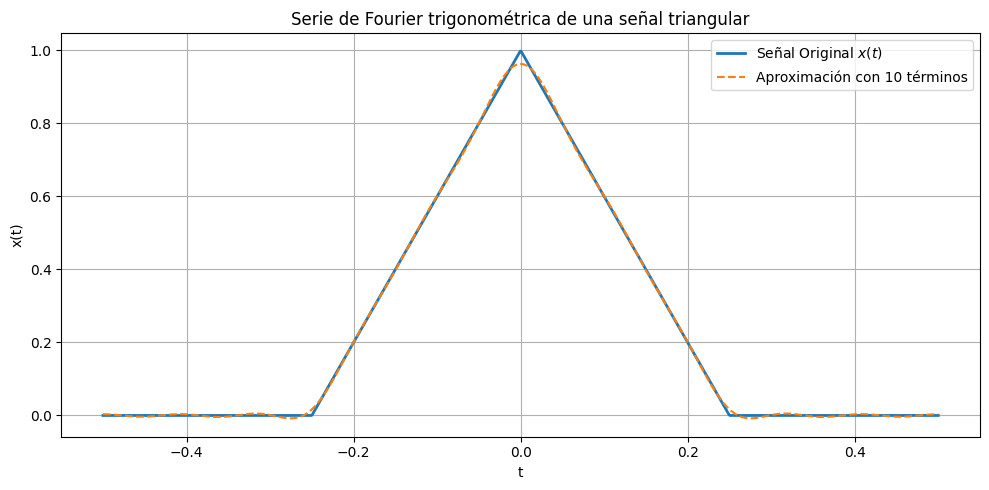

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, integrate, cos, pi, simplify, lambdify

# Parámetros
tau_val = 1
B_val = 1

# Variables simbólicas
t, n, tau, B = symbols('t n tau B', real=True)

# Definición de la señal triangular por tramos
x_t_sym1 = (4*B/tau)*(t + tau/4)  # para t en [-tau/4, 0]
x_t_sym2 = (-4*B/tau)*(t - tau/4) # para t en [0, tau/4]

# Coeficientes a0 y an (solo cosenos por simetría par)
a0 = (2/tau) * (
    integrate(x_t_sym1, (t, -tau/4, 0)) +
    integrate(x_t_sym2, (t, 0, tau/4))
)

an = (2/tau) * (
    integrate(x_t_sym1 * cos(2 * pi * n * t / tau), (t, -tau/4, 0)) +
    integrate(x_t_sym2 * cos(2 * pi * n * t / tau), (t, 0, tau/4))
)

# Sustituimos valores
a0_val = a0.subs({tau: tau_val, B: B_val})
an_expr = simplify(an.subs({tau: tau_val, B: B_val}))

# Convertimos an a función
an_func = lambdify(n, an_expr, modules=["numpy"])

# Aproximación con N términos
N = 10
n_vals = np.arange(1, N+1)
an_vals = np.array([an_func(k) for k in n_vals])

t_vals = np.linspace(-tau_val/2, tau_val/2, 1000)
x_approx = np.full_like(t_vals, float(a0_val) / 2)

for i, an_val in enumerate(an_vals, start=1):
    x_approx += an_val * np.cos(2 * np.pi * i * t_vals / tau_val)

# Función original por tramos
def x_t(t_array):
    x = np.zeros_like(t_array)
    for i, ti in enumerate(t_array):
        if -tau_val/4 <= ti < 0:
            x[i] = (4*B_val/tau_val)*(ti + tau_val/4)
        elif 0 <= ti <= tau_val/4:
            x[i] = (-4*B_val/tau_val)*(ti - tau_val/4)
    return x

x_original = x_t(t_vals)

# Gráfica
plt.figure(figsize=(10, 5))
plt.plot(t_vals, x_original, label='Señal Original $x(t)$', linewidth=2)
plt.plot(t_vals, x_approx, '--', label=f'Aproximación con {N} términos')
plt.title('Serie de Fourier trigonométrica de una señal triangular')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

